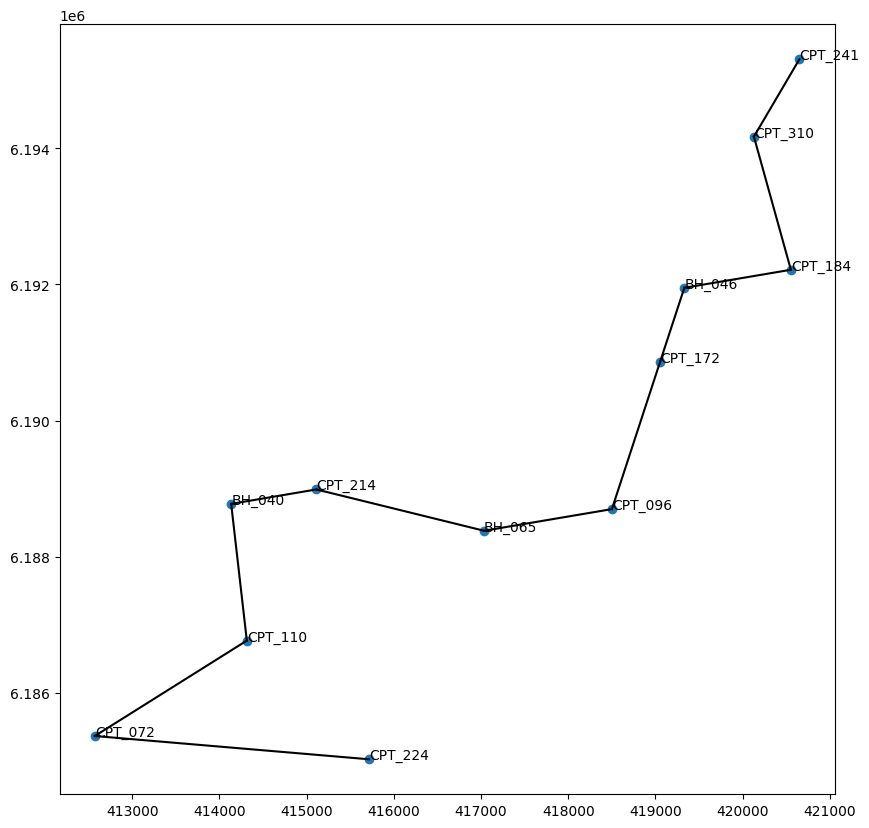

In [6]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load data
df = pd.read_csv('locations.csv', header=None, names=['city', 'x', 'y'])

# Prompt user for current city
current_city = input("Please enter your current city (leave empty and press enter to use the first city in the list): ")

# If no city is entered, use the first city in the list
if current_city == '':
    current_city = df.iloc[0]['city']
# If a city is entered, validate input
elif current_city not in df['city'].values:
    raise ValueError("Invalid city. Make sure it's one of the cities in the dataset.")

# Calculate distance matrix
distances = distance_matrix(df[['x', 'y']].values, df[['x', 'y']].values)
dist_matrix = pd.DataFrame(distances, index=df.city, columns=df.city)

# Create graph
G = nx.from_numpy_array(dist_matrix.values.astype(float))

# Get index of current city
source_index = df[df['city'] == current_city].index[0]

# Find initial path
tsp_route = nx.approximation.greedy_tsp(G, source=source_index)

# 2-opt algorithm
for _ in range(50):  # Run for a fixed number of iterations
    for i, j in combinations(range(1, len(tsp_route) - 1), 2):  # For each pair of edges in the path
        if i != j:
            new_route = tsp_route[:i] + tsp_route[i:j][::-1] + tsp_route[j:]  # Try reversing the path between i and j
            if sum(dist_matrix.values[new_route[i], new_route[i - 1]] for i in range(1, len(new_route))) < sum(
                    dist_matrix.values[tsp_route[i], tsp_route[i - 1]] for i in range(1, len(tsp_route))):  # If the new path is shorter
                tsp_route = new_route  # Update the path

# Get city names
route = [(df.iloc[i]['city'], df.iloc[i]['x'], df.iloc[i]['y']) for i in tsp_route]

# Remove last city to make it one way
route_one_way = route[:-1]

# Save result
with open('route.txt', 'w') as f:
    for city, x, y in route_one_way:
        f.write(f'{city}, {x}, {y}\n')

# Create plot
plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'])

# Add labels
for _, row in df.iterrows():
    plt.text(row['x'], row['y'], row['city'])

prev_node = tsp_route[0]
for node in tsp_route[1:-1]:  # stop one city before the end
    plt.plot([df.iloc[prev_node]['x'], df.iloc[node]['x']], [df.iloc[prev_node]['y'], df.iloc[node]['y']], 'k-')
    prev_node = node
plt.show()


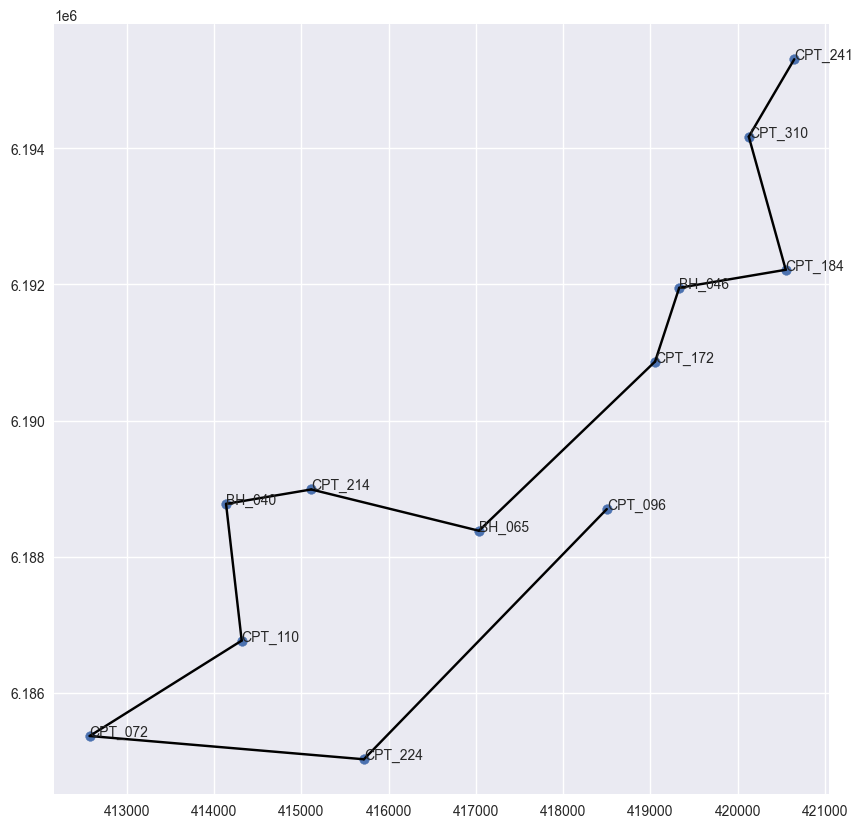

In [47]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load data
df = pd.read_csv('locations copy.csv', header=None, names=['city', 'x', 'y'])

# Prompt user for current city
current_city = input("Please enter your current city (leave empty and press enter to use the first city in the list): ")

# If no city is entered, use the first city in the list
if current_city == '':
    current_city = df.iloc[0]['city']
# If a city is entered, validate input
elif current_city not in df['city'].values:
    raise ValueError("Invalid city. Make sure it's one of the cities in the dataset.")

# Calculate distance matrix
distances = distance_matrix(df[['x', 'y']].values, df[['x', 'y']].values)
dist_matrix = pd.DataFrame(distances, index=df.city, columns=df.city)

# Create graph
G = nx.from_numpy_array(dist_matrix.values.astype(float))

# Get index of current city
source_index = df[df['city'] == current_city].index[0]

# Find initial path
tsp_route = nx.approximation.greedy_tsp(G, source=source_index)

# 2-opt algorithm
for _ in range(50):  # Run for a fixed number of iterations
    for i, j in combinations(range(1, len(tsp_route) - 1), 2):  # For each pair of edges in the path
        if i != j:
            new_route = tsp_route[:i] + tsp_route[i:j][::-1] + tsp_route[j:]  # Try reversing the path between i and j
            if sum(dist_matrix.values[new_route[i], new_route[i - 1]] for i in range(1, len(new_route))) < sum(
                    dist_matrix.values[tsp_route[i], tsp_route[i - 1]] for i in range(1, len(tsp_route))):  # If the new path is shorter
                tsp_route = new_route  # Update the path

# Get city names
route = [(df.iloc[i]['city'], df.iloc[i]['x'], df.iloc[i]['y']) for i in tsp_route]

# Remove last city to make it one way
route_one_way = route[:-1]

# Save result
with open('route.txt', 'w') as f:
    for city, x, y in route_one_way:
        f.write(f'{city}, {x}, {y}\n')

# Create plot
plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'])

# Add labels
for _, row in df.iterrows():
    plt.text(row['x'], row['y'], row['city'])

prev_node = tsp_route[0]
for node in tsp_route[1:-1]:  # stop one city before the end
    plt.plot([df.iloc[prev_node]['x'], df.iloc[node]['x']], [df.iloc[prev_node]['y'], df.iloc[node]['y']], 'k-')
    prev_node = node
plt.show()

C:\Users\Edin.Smlatic\AppData\Local\Temp\ipykernel_16168\2668132732.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Edin.Smlatic\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Edin.Smlatic\AppData\Local\Temp\ipykernel_16168\2668132732.py", line 101, in plot_route
    if canvas:
       ^^^^^^
UnboundLocalError: cannot access local variable 'canvas' where it is not associated with a value
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Edin.Smlatic\AppData\Local\Programs\Python\Python311\Lib\tkinter\__in

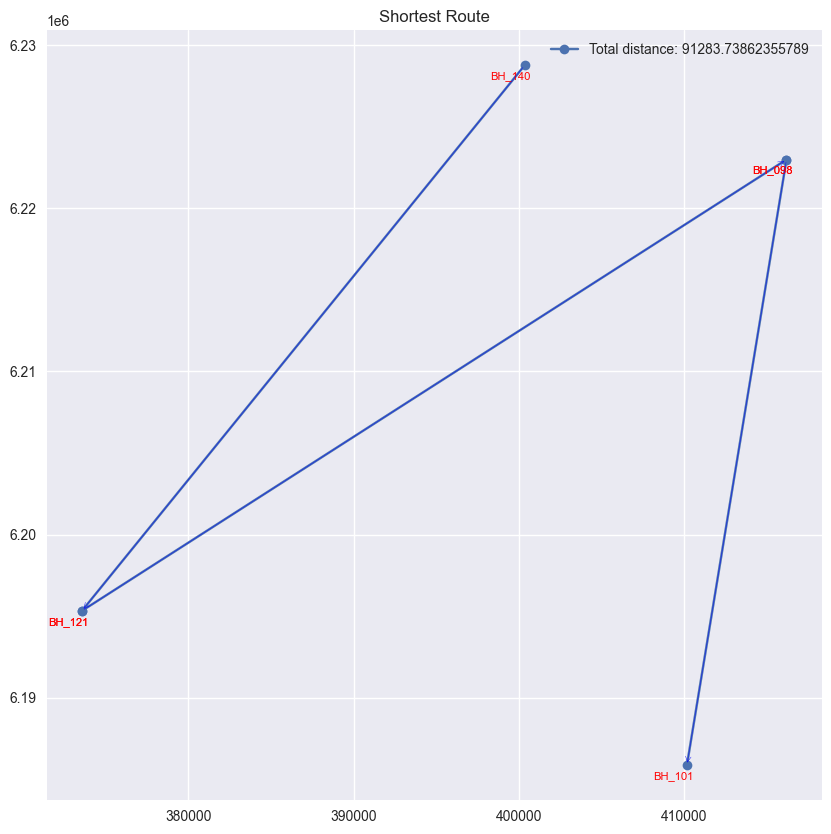

In [23]:
import pandas as pd
import networkx as nx
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox
from scipy.spatial import distance_matrix
from itertools import combinations
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import seaborn

df = None
routes = []
df_selected = None
plt.style.use('seaborn')

def load_dataset():
    global df
    try:
        filename = filedialog.askopenfilename(initialdir = "/", title = "Select file", filetypes = (("csv files","*.csv"),("all files","*.*")))
        df = pd.read_csv(filename, header=None)
        df.columns = ["city", "x", "y"]
        update_listbox()
    except Exception as e:
        messagebox.showerror("Error", str(e))

def update_listbox():
    for index, row in df.iterrows():
        city_listbox.insert(END, row['city'])

def calculate_route():
    global routes, df_selected
    try:
        selected_cities = [city_listbox.get(i) for i in city_listbox.curselection()]
        df_selected = df[df['city'].isin(selected_cities)].reset_index(drop=True)
        distances = distance_matrix(df_selected[['x', 'y']].values, df_selected[['x', 'y']].values)
        dist_matrix = pd.DataFrame(distances, index=df_selected.city, columns=df_selected.city)
        G = nx.from_numpy_array(dist_matrix.values.astype(float))

        tsp_route = nx.approximation.greedy_tsp(G)
        tsp_route = tsp_route[:-1]  # remove last city to make it one-way

        # remaining parts of the function ...

        for _ in range(50):  
            for i, j in combinations(range(1, len(tsp_route) - 1), 2): 
                if i != j:
                    new_route = tsp_route[:i] + tsp_route[j:i:-1] + tsp_route[j:]
                    if sum(dist_matrix.values[new_route[i], new_route[i - 1]] for i in range(1, len(new_route))) < sum(
                            dist_matrix.values[tsp_route[i], tsp_route[i - 1]] for i in range(1, len(tsp_route))): 
                        tsp_route = new_route  

        routes.append((tsp_route, sum(dist_matrix.values[tsp_route[i], tsp_route[i - 1]] for i in range(1, len(tsp_route)))))

        for direction in ['north_to_south', 'south_to_north', 'west_to_east']:
            if direction == 'north_to_south':
                df_sorted = df_selected.sort_values(by='y', ascending=False)
            elif direction == 'south_to_north':
                df_sorted = df_selected.sort_values(by='y', ascending=True)
            elif direction == 'west_to_east':
                df_sorted = df_selected.sort_values(by='x', ascending=True)

            distances = distance_matrix(df_sorted[['x', 'y']].values, df_sorted[['x', 'y']].values)
            dist_matrix = pd.DataFrame(distances, index=df_sorted.city, columns=df_sorted.city)
            G = nx.from_numpy_array(dist_matrix.values.astype(float))
            tsp_route = nx.approximation.greedy_tsp(G)
            tsp_route = tsp_route[:-1]  # remove last city to make it one-way

            for _ in range(50):  
                for i, j in combinations(range(1, len(tsp_route) - 1), 2): 
                    if i != j:
                        new_route = tsp_route[:i] + tsp_route[j:i:-1] + tsp_route[j:] 
                        if sum(dist_matrix.values[new_route[i], new_route[i - 1]] for i in range(1, len(new_route))) < sum(
                                dist_matrix.values[tsp_route[i], tsp_route[i - 1]] for i in range(1, len(tsp_route))): 
                            tsp_route = new_route  

            routes.append((tsp_route, sum(dist_matrix.values[tsp_route[i], tsp_route[i - 1]] for i in range(1, len(tsp_route)))))

        route_listbox.delete(0, END)
        for route, total_distance in routes:
            route_listbox.insert(END, f"Route: {[df_selected.iloc[i]['city'] for i in route]}, Total Distance: {total_distance}")
    except Exception as e:
        messagebox.showerror("Error", str(e))

def plot_route(event):
    global df_selected
    selected_route = route_listbox.curselection()
    route, total_distance = routes[selected_route[0]]
    fig = Figure(figsize=(5, 5))
    a = fig.add_subplot(111)
    a.plot(df_selected.loc[route[:-1], 'x'], df_selected.loc[route[:-1], 'y'], marker = 'o')
    for i, city in enumerate(route[:-1]):
        a.annotate(df_selected.loc[city, 'city'], (df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                     textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='red')
        a.annotate('', (df_selected.loc[route[i+1], 'x'], df_selected.loc[route[i+1], 'y']),
                   xytext=(df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                   arrowprops=dict(arrowstyle='->', color='blue'))
    a.legend([f'Total distance: {total_distance}'])
    a.set_title('Shortest Route')
    if canvas:
        canvas.get_tk_widget().destroy()
    canvas = FigureCanvasTkAgg(fig, master = plot_frame)
    canvas.draw()

def save_plot():
    selected_route = route_listbox.curselection()
    route, total_distance = routes[selected_route[0]]
    fig = plt.figure(figsize=(10, 10))
    plt.plot(df_selected.loc[route[:-1], 'x'], df_selected.loc[route[:-1], 'y'], marker = 'o')
    for i, city in enumerate(route[:-1]):
        plt.annotate(df_selected.loc[city, 'city'], (df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                     textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='red')
        plt.annotate('', (df_selected.loc[route[i+1], 'x'], df_selected.loc[route[i+1], 'y']),
                   xytext=(df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                   arrowprops=dict(arrowstyle='->', color='blue'))
    plt.legend([f'Total distance: {total_distance}'])
    plt.title('Shortest Route')
    plt.savefig('route.png')

root = Tk()
root.title('Shortest Route Finder')
root.geometry('800x800')

load_button = Button(root, text='Load Dataset', command=load_dataset)
load_button.pack()

city_label = Label(root, text="Enter current city:")
city_label.pack()

city_entry = Entry(root)
city_entry.pack()

calculate_button = Button(root, text='Calculate Route', command=calculate_route)
calculate_button.pack()

city_listbox = Listbox(root, selectmode=MULTIPLE)
city_listbox.pack(fill=BOTH, expand=1)

route_listbox = Listbox(root)
route_listbox.pack(fill=BOTH, expand=1)
route_listbox.bind('<<ListboxSelect>>', plot_route)

plot_frame = Frame(root)
plot_frame.pack(fill=BOTH, expand=1)

canvas = None  # initialize canvas as None

save_button = Button(root, text='Save Plot', command=save_plot)
save_button.pack()

root.mainloop()


In [24]:
import pandas as pd
import networkx as nx
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox
from scipy.spatial import distance_matrix
from itertools import combinations
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

df = None
routes = []
df_selected = None
canvas = None
plt.style.use('seaborn')

def load_dataset():
    global df
    try:
        filename = filedialog.askopenfilename(initialdir = "/", title = "Select file", filetypes = (("csv files","*.csv"),("all files","*.*")))
        df = pd.read_csv(filename, header=None)
        df.columns = ["city", "x", "y"]
        update_listbox()
    except Exception as e:
        messagebox.showerror("Error", str(e))

def update_listbox():
    for index, row in df.iterrows():
        city_listbox.insert(END, row['city'])

def calculate_route():
    global routes, df_selected
    try:
        selected_cities = [city_listbox.get(i) for i in city_listbox.curselection()]
        df_selected = df[df['city'].isin(selected_cities)].reset_index(drop=True)
        distances = distance_matrix(df_selected[['x', 'y']].values, df_selected[['x', 'y']].values)
        dist_matrix = pd.DataFrame(distances, index=df_selected.city, columns=df_selected.city)
        G = nx.from_numpy_array(dist_matrix.values.astype(float))
        tsp_route = nx.approximation.greedy_tsp(G, source=0)
        tsp_route = tsp_route[:-1]  # Prevent forming a cycle by removing the last city
        for _ in range(50):  
            for i, j in combinations(range(1, len(tsp_route) - 1), 2): 
                if i != j:
                    new_route = tsp_route[:i] + tsp_route[j:i-1:-1] + tsp_route[j:] 
                    if sum(dist_matrix.values[new_route[i], new_route[i - 1]] for i in range(1, len(new_route))) < sum(
                            dist_matrix.values[tsp_route[i], tsp_route[i - 1]] for i in range(1, len(tsp_route))): 
                        tsp_route = new_route  

        routes.append((tsp_route, sum(dist_matrix.values[tsp_route[i], tsp_route[i - 1]] for i in range(1, len(tsp_route)))))
        route_listbox.delete(0, END)
        for route, total_distance in routes:
            route_listbox.insert(END, f"Route: {[df_selected.iloc[i]['city'] for i in route]}, Total Distance: {total_distance}")
    except Exception as e:
        messagebox.showerror("Error", str(e))

def plot_route(event):
    global df_selected, canvas
    selected_route = route_listbox.curselection()
    route, total_distance = routes[selected_route[0]]
    fig = Figure(figsize=(5, 5))
    a = fig.add_subplot(111)
    a.plot(df_selected.loc[route[:-1], 'x'], df_selected.loc[route[:-1], 'y'], marker = 'o')
    for i, city in enumerate(route[:-1]):
        a.annotate(df_selected.loc[city, 'city'], (df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                     textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='red')
        a.annotate('', (df_selected.loc[route[i+1], 'x'], df_selected.loc[route[i+1], 'y']),
                   xytext=(df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                   arrowprops=dict(arrowstyle='->', color='blue'))
    a.legend([f'Total distance: {total_distance}'])
    a.set_title('Shortest Route')
    if canvas:
        canvas.get_tk_widget().destroy()
    canvas = FigureCanvasTkAgg(fig, master = plot_frame)
    canvas.draw()

def save_plot():
    selected_route = route_listbox.curselection()
    route, total_distance = routes[selected_route[0]]
    fig = plt.figure(figsize=(10, 10))
    plt.plot(df_selected.loc[route[:-1], 'x'], df_selected.loc[route[:-1], 'y'], marker = 'o')
    for i, city in enumerate(route[:-1]):
        plt.annotate(df_selected.loc[city, 'city'], (df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                     textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='red')
        plt.annotate('', (df_selected.loc[route[i+1], 'x'], df_selected.loc[route[i+1], 'y']),
                   xytext=(df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                   arrowprops=dict(arrowstyle='->', color='blue'))
    plt.legend([f'Total distance: {total_distance}'])
    plt.title('Shortest Route')
    plt.savefig('route.png')

root = Tk()
root.title('Shortest Route Finder')
root.geometry('800x800')

load_button = Button(root, text='Load Dataset', command=load_dataset)
load_button.pack()

calculate_button = Button(root, text='Calculate Route', command=calculate_route)
calculate_button.pack()

city_listbox = Listbox(root, selectmode=MULTIPLE)
city_listbox.pack(fill=BOTH, expand=1)

route_listbox = Listbox(root)
route_listbox.pack(fill=BOTH, expand=1)
route_listbox.bind('<<ListboxSelect>>', plot_route)

plot_frame = Frame(root)
plot_frame.pack(fill=BOTH, expand=1)

save_button = Button(root, text='Save Plot', command=save_plot)
save_button.pack()

root.mainloop()


C:\Users\Edin.Smlatic\AppData\Local\Temp\ipykernel_16168\2404005129.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Edin.Smlatic\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Edin.Smlatic\AppData\Local\Temp\ipykernel_16168\2404005129.py", line 60, in plot_route
    route, total_distance = routes[selected_route[0]]
                                   ~~~~~~~~~~~~~~^^^
IndexError: tuple index out of range


In [27]:
import pandas as pd
import networkx as nx
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox
from scipy.spatial import distance_matrix
from itertools import combinations
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import matplotlib.pyplot as plt

df = None
routes = []
df_selected = None
canvas = None
plt.style.use('seaborn')

def load_dataset():
    global df
    try:
        filename = filedialog.askopenfilename(initialdir = "/", title = "Select file", filetypes = (("csv files","*.csv"),("all files","*.*")))
        df = pd.read_csv(filename, header=None)
        df.columns = ["city", "x", "y"]
        update_listbox()
    except Exception as e:
        messagebox.showerror("Error", str(e))

def update_listbox():
    for index, row in df.iterrows():
        city_listbox.insert(END, row['city'])

def calculate_route():
    global routes, df_selected
    try:
        selected_cities = [city_listbox.get(i) for i in city_listbox.curselection()]
        df_selected = df[df['city'].isin(selected_cities)].reset_index(drop=True)

        for direction in ['north_to_south', 'south_to_north', 'west_to_east']:
            if direction == 'north_to_south':
                df_sorted = df_selected.sort_values(by='y', ascending=False)
            elif direction == 'south_to_north':
                df_sorted = df_selected.sort_values(by='y', ascending=True)
            elif direction == 'west_to_east':
                df_sorted = df_selected.sort_values(by='x', ascending=True)

            distances = distance_matrix(df_sorted[['x', 'y']].values, df_sorted[['x', 'y']].values)
            dist_matrix = pd.DataFrame(distances, index=df_sorted.city, columns=df_sorted.city)
            G = nx.from_numpy_array(dist_matrix.values.astype(float))
            source_index = df_sorted[df_sorted['city'] == city_entry.get()].index[0]
            tsp_route = nx.approximation.greedy_tsp(G, source=source_index)

            tsp_route = tsp_route[:-1]  # Prevent forming a cycle
            for _ in range(50):
                tsp_route = two_opt(tsp_route, dist_matrix.values)
            routes.append((tsp_route, calculate_total_distance(tsp_route, dist_matrix.values)))
            update_routes()

    except Exception as e:
        messagebox.showerror("Error", str(e))

def two_opt(tsp_route, dist_matrix):
    best_route = tsp_route.copy()
    best_distance = calculate_total_distance(best_route, dist_matrix)

    for i, j in combinations(range(len(tsp_route)), 2):
        if j - i == 1: continue
        if i == 0 and j == len(tsp_route) - 1: continue
        new_route = tsp_route.copy()
        new_route[i:j+1] = reversed(tsp_route[i:j+1])
        new_distance = calculate_total_distance(new_route, dist_matrix)
        if new_distance < best_distance:
            best_route = new_route
            best_distance = new_distance
    return best_route

def calculate_total_distance(tsp_route, dist_matrix):
    total_distance = 0
    for i in range(len(tsp_route) - 1):
        total_distance += dist_matrix[tsp_route[i]][tsp_route[i + 1]]
    return total_distance

def update_routes():
    route_listbox.delete(0, END)
    for i, (route, total_distance) in enumerate(routes):
        route_cities = ' -> '.join(df_selected.loc[route, 'city'])
        route_listbox.insert(END, f"Route {i+1}: {route_cities} (total distance: {total_distance})")

def plot_route(event):
    global df_selected, canvas
    selected_route = route_listbox.curselection()
    route, total_distance = routes[selected_route[0]]
    fig = Figure(figsize=(5, 5))
    a = fig.add_subplot(111)
    a.plot(df_selected.loc[route[:-1], 'x'], df_selected.loc[route[:-1], 'y'], marker = 'o')
    for i, city in enumerate(route[:-1]):
        a.annotate(df_selected.loc[city, 'city'], (df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                     textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='red')
        a.annotate('', (df_selected.loc[route[i+1], 'x'], df_selected.loc[route[i+1], 'y']),
                   xytext=(df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                   arrowprops=dict(arrowstyle='->', color='blue'))
    a.legend([f'Total distance: {total_distance}'])
    a.set_title('Shortest Route')
    if canvas:
        canvas.get_tk_widget().destroy()
    canvas = FigureCanvasTkAgg(fig, master = plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

root = Tk()
root.title('Shortest Route Finder')
root.geometry('800x800')

load_button = Button(root, text='Load Dataset', command=load_dataset)
load_button.pack()

city_label = Label(root, text="Enter current city:")
city_label.pack()

city_entry = Entry(root)
city_entry.pack()

calculate_button = Button(root, text='Calculate Route', command=calculate_route)
calculate_button.pack()

city_listbox = Listbox(root, selectmode=MULTIPLE)
city_listbox.pack(fill=BOTH, expand=1)

route_listbox = Listbox(root)
route_listbox.pack(fill=BOTH, expand=1)
route_listbox.bind('<<ListboxSelect>>', plot_route)

plot_frame = Frame(root)
plot_frame.pack(fill=BOTH, expand=1)

root.mainloop()


C:\Users\Edin.Smlatic\AppData\Local\Temp\ipykernel_16168\235968319.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [32]:
import pandas as pd
import networkx as nx
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox
from scipy.spatial import distance_matrix
from itertools import combinations
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import seaborn as sns

df = None
routes = []
df_selected = None
plt.style.use('seaborn')
canvas = None

def load_dataset():
    global df
    try:
        filename = filedialog.askopenfilename(initialdir = "/", title = "Select file", filetypes = (("csv files","*.csv"),("all files","*.*")))
        df = pd.read_csv(filename, header=None)
        df.columns = ["city", "x", "y"]
        update_listbox()
    except Exception as e:
        messagebox.showerror("Error", str(e))

def update_listbox():
    for index, row in df.iterrows():
        city_listbox.insert(END, row['city'])

def calculate_route():
    global routes, df_selected
    try:
        selected_cities = [city_listbox.get(i) for i in city_listbox.curselection()]
        df_selected = df[df['city'].isin(selected_cities)].reset_index(drop=True)

        # Compute distance matrix
        distances = distance_matrix(df_selected[['x', 'y']].values, df_selected[['x', 'y']].values)
        dist_matrix = pd.DataFrame(distances, index=df_selected.city, columns=df_selected.city)
        
        # Apply TSP
        G = nx.from_numpy_array(dist_matrix.values.astype(float))
        tsp_route = nx.approximation.greedy_tsp(G, source=df_selected[df_selected['city'] == city_entry.get()].index[0])
        tsp_route = tsp_route[:-1] # To make the path not a cycle
        
        # Apply 2-opt to improve the route
        for _ in range(50):
            tsp_route = two_opt(tsp_route, dist_matrix.values)
        routes.append((tsp_route, calculate_total_distance(tsp_route, dist_matrix.values)))
        update_routes()

    except Exception as e:
        messagebox.showerror("Error", str(e))

def two_opt(tsp_route, dist_matrix):
    best_route = tsp_route.copy()
    best_distance = calculate_total_distance(best_route, dist_matrix)

    for i, j in combinations(range(len(tsp_route)), 2):
        if j - i == 1: continue
        if i == 0 and j == len(tsp_route) - 1: continue
        new_route = tsp_route.copy()
        new_route[i:j+1] = reversed(tsp_route[i:j+1])
        new_distance = calculate_total_distance(new_route, dist_matrix)
        if new_distance < best_distance:
            best_route = new_route
            best_distance = new_distance
    return best_route

def calculate_total_distance(tsp_route, dist_matrix):
    total_distance = 0
    for i in range(len(tsp_route) - 1):
        total_distance += dist_matrix[tsp_route[i]][tsp_route[i + 1]]
    return total_distance

def update_routes():
    route_listbox.delete(0, END)
    for i, (route, total_distance) in enumerate(routes):
        route_cities = ' -> '.join(df_selected.loc[route, 'city'])
        route_listbox.insert(END, f"Route {i+1}: {route_cities} (total distance: {total_distance})")

def plot_route(event):
    global df_selected, canvas
    selected_route = route_listbox.curselection()
    route, total_distance = routes[selected_route[0]]
    fig = Figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.plot(df_selected.loc[route, 'x'], df_selected.loc[route, 'y'], marker = 'o')
    for i, city in enumerate(route):
        ax.annotate(df_selected.loc[city, 'city'], (df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                    textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='red')
        if i < len(route) - 1:
            ax.annotate('', (df_selected.loc[route[i+1], 'x'], df_selected.loc[route[i+1], 'y']),
                        xytext=(df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                        arrowprops=dict(arrowstyle='->', color='blue'))
    ax.legend([f'Total distance: {total_distance}'])
    ax.set_title('Shortest Route')
    if canvas:
        canvas.get_tk_widget().destroy()
    canvas = FigureCanvasTkAgg(fig, master = plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=BOTH, expand=1)

def save_plot():
    selected_route = route_listbox.curselection()
    route, total_distance = routes[selected_route[0]]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(df_selected.loc[route, 'x'], df_selected.loc[route, 'y'], marker = 'o')
    for i, city in enumerate(route):
        ax.annotate(df_selected.loc[city, 'city'], (df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                    textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='red')
        if i < len(route) - 1:
            ax.annotate('', (df_selected.loc[route[i+1], 'x'], df_selected.loc[route[i+1], 'y']),
                        xytext=(df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                        arrowprops=dict(arrowstyle='->', color='blue'))
    ax.legend([f'Total distance: {total_distance}'])
    ax.set_title('Shortest Route')
    plt.savefig('route.png')

root = Tk()
root.title('Shortest Route Finder')
root.geometry('800x800')

load_button = Button(root, text='Load Dataset', command=load_dataset)
load_button.pack()

city_label = Label(root, text="Enter current city:")
city_label.pack()

city_entry = Entry(root)
city_entry.pack()

calculate_button = Button(root, text='Calculate Route', command=calculate_route)
calculate_button.pack()

city_listbox = Listbox(root, selectmode=MULTIPLE)
city_listbox.pack(fill=BOTH, expand=1)

route_listbox = Listbox(root)
route_listbox.pack(fill=BOTH, expand=1)
route_listbox.bind('<<ListboxSelect>>', plot_route)

plot_frame = Frame(root)
plot_frame.pack(fill=BOTH, expand=1)

save_button = Button(root, text='Save Plot', command=save_plot)
save_button.pack()

root.mainloop()


C:\Users\Edin.Smlatic\AppData\Local\Temp\ipykernel_16168\3224403441.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


C:\Users\Edin.Smlatic\AppData\Local\Temp\ipykernel_16168\2535161651.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


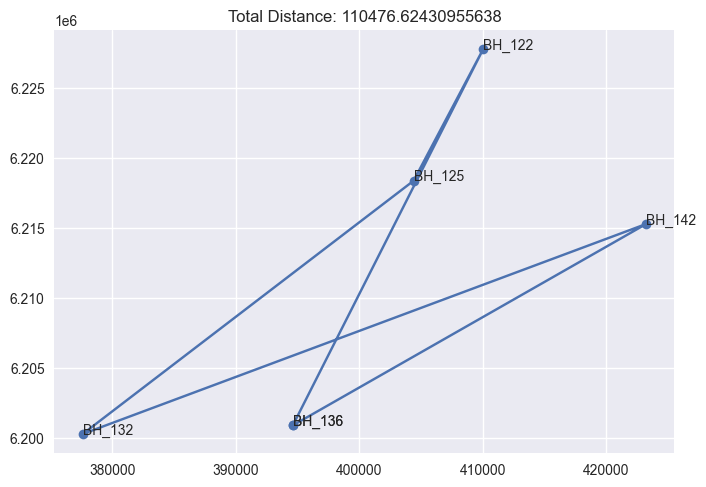

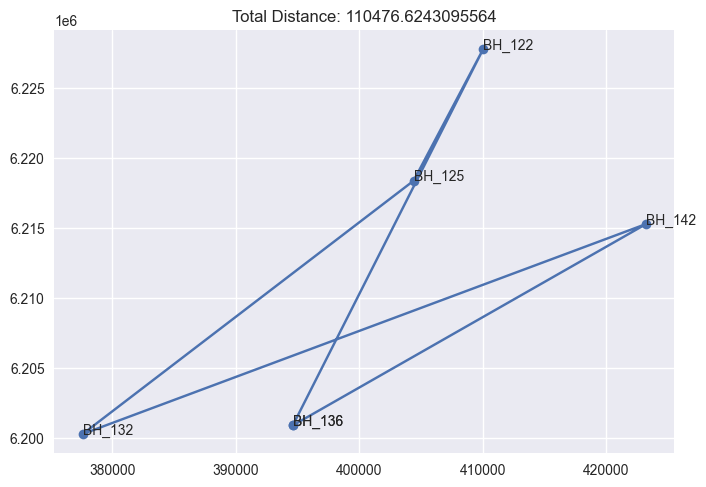

In [30]:
import pandas as pd
import networkx as nx
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox
from scipy.spatial import distance_matrix
from itertools import combinations
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import matplotlib.pyplot as plt
import numpy as np

df = None
routes = []
df_selected = None
canvas = None
plt.style.use('seaborn')

def load_dataset():
    global df
    filename = filedialog.askopenfilename(initialdir = "/", title = "Select file", filetypes = (("csv files","*.csv"),("all files","*.*")))
    df = pd.read_csv(filename, header=None)
    df.columns = ["city", "x", "y"]
    update_listbox()

def update_listbox():
    for index, row in df.iterrows():
        city_listbox.insert(END, row['city'])

def calculate_route():
    global routes, df_selected
    selected_cities = [city_listbox.get(i) for i in city_listbox.curselection()]
    df_selected = df[df['city'].isin(selected_cities)].reset_index(drop=True)
    distances = distance_matrix(df_selected[['x', 'y']].values, df_selected[['x', 'y']].values)
    dist_matrix = pd.DataFrame(distances, index=df_selected.city, columns=df_selected.city)
    G = nx.from_numpy_array(dist_matrix.values)
    tsp_route = nx.approximation.greedy_tsp(G, source=df_selected[df_selected['city'] == city_entry.get()].index[0])
    routes.append((tsp_route, sum(dist_matrix.values[tsp_route[i], tsp_route[i - 1]] for i in range(1, len(tsp_route)))))
    for direction in ['north_to_south', 'south_to_north', 'west_to_east']:
        if direction == 'north_to_south':
            df_sorted = df_selected.sort_values(by='y', ascending=False)
        elif direction == 'south_to_north':
            df_sorted = df_selected.sort_values(by='y', ascending=True)
        elif direction == 'west_to_east':
            df_sorted = df_selected.sort_values(by='x', ascending=True)
        distances = distance_matrix(df_sorted[['x', 'y']].values, df_sorted[['x', 'y']].values)
        dist_matrix = pd.DataFrame(distances, index=df_sorted.city, columns=df_sorted.city)
        G = nx.from_numpy_array(dist_matrix.values)
        source_index = df_sorted[df_sorted['city'] == city_entry.get()].index[0]
        tsp_route = nx.approximation.greedy_tsp(G, source=source_index)
        routes.append((tsp_route, sum(dist_matrix.values[tsp_route[i], tsp_route[i - 1]] for i in range(1, len(tsp_route)))))
    route_listbox.delete(0, END)
    for route, total_distance in routes:
        route_listbox.insert(END, f"Route: {[df_selected.iloc[i]['city'] for i in route]}, Total Distance: {total_distance}")

def plot_route(event):
    global df_selected, canvas
    selected_route = route_listbox.curselection()
    route, total_distance = routes[selected_route[0]]
    fig = Figure(figsize=(5, 5))
    a = fig.add_subplot(111)
    a.plot(df_selected.loc[route, 'x'], df_selected.loc[route, 'y'], marker = 'o')
    for i, txt in enumerate(df_selected.loc[route, 'city']):
        a.annotate(txt, (df_selected.loc[route[i], 'x'], df_selected.loc[route[i], 'y']))
    a.set_title(f'Total Distance: {total_distance}')
    if canvas:
        canvas.get_tk_widget().destroy()
    canvas = FigureCanvasTkAgg(fig, master = plot_frame)
    canvas.draw()

def save_plot():
    selected_route = route_listbox.curselection()
    route, total_distance = routes[selected_route[0]]
    fig, ax = plt.subplots()
    ax.plot(df_selected.loc[route, 'x'], df_selected.loc[route, 'y'], marker = 'o')
    for i, txt in enumerate(df_selected.loc[route, 'city']):
        ax.annotate(txt, (df_selected.loc[route[i], 'x'], df_selected.loc[route[i], 'y']))
    ax.set_title(f'Total Distance: {total_distance}')
    plt.show()

root = Tk()
root.title('Shortest Route Finder')
root.geometry('800x800')

load_button = Button(root, text='Load Dataset', command=load_dataset)
load_button.pack()

city_label = Label(root, text="Enter current city:")
city_label.pack()

city_entry = Entry(root)
city_entry.pack()

calculate_button = Button(root, text='Calculate Route', command=calculate_route)
calculate_button.pack()

city_listbox = Listbox(root, selectmode=MULTIPLE)
city_listbox.pack(fill=BOTH, expand=1)

route_listbox = Listbox(root)
route_listbox.pack(fill=BOTH, expand=1)
route_listbox.bind('<<ListboxSelect>>', plot_route)

plot_frame = Frame(root)
plot_frame.pack(fill=BOTH, expand=1)

save_button = Button(root, text='Open Plot in New Window', command=save_plot)
save_button.pack()

root.mainloop()


In [35]:
import pandas as pd
import networkx as nx
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox
from scipy.spatial import distance_matrix
from itertools import combinations
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import matplotlib.pyplot as plt

df = None
routes = []
df_selected = None
canvas = None
plt.style.use('seaborn')

def load_dataset():
    global df
    try:
        filename = filedialog.askopenfilename(initialdir = "/", title = "Select file", filetypes = (("csv files","*.csv"),("all files","*.*")))
        df = pd.read_csv(filename, header=None)
        df.columns = ["city", "x", "y"]
        update_listbox()
    except Exception as e:
        messagebox.showerror("Error", str(e))

def update_listbox():
    for index, row in df.iterrows():
        city_listbox.insert(END, row['city'])

def calculate_route():
    global routes, df_selected
    try:
        selected_cities = [city_listbox.get(i) for i in city_listbox.curselection()]
        df_selected = df[df['city'].isin(selected_cities)].reset_index(drop=True)

        for direction in ['north_to_south', 'south_to_north', 'west_to_east']:
            if direction == 'north_to_south':
                df_sorted = df_selected.sort_values(by='y', ascending=False)
            elif direction == 'south_to_north':
                df_sorted = df_selected.sort_values(by='y', ascending=True)
            elif direction == 'west_to_east':
                df_sorted = df_selected.sort_values(by='x', ascending=True)

            distances = distance_matrix(df_sorted[['x', 'y']].values, df_sorted[['x', 'y']].values)
            dist_matrix = pd.DataFrame(distances, index=df_sorted.city, columns=df_sorted.city)
            G = nx.from_numpy_array(dist_matrix.values.astype(float))
            source_index = df_sorted[df_sorted['city'] == city_entry.get()].index[0]
            tsp_route = nx.approximation.greedy_tsp(G, source=source_index)

            tsp_route = tsp_route[:-1]  # Prevent forming a cycle
            for _ in range(50):
                tsp_route = two_opt(tsp_route, dist_matrix.values)
            routes.append((tsp_route, calculate_total_distance(tsp_route, dist_matrix.values)))
            update_routes()

    except Exception as e:
        messagebox.showerror("Error", str(e))

def two_opt(tsp_route, dist_matrix):
    best_route = tsp_route.copy()
    best_distance = calculate_total_distance(best_route, dist_matrix)

    for i, j in combinations(range(len(tsp_route)), 2):
        if j - i == 1: continue
        if i == 0 and j == len(tsp_route) - 1: continue
        new_route = tsp_route.copy()
        new_route[i:j+1] = reversed(tsp_route[i:j+1])
        new_distance = calculate_total_distance(new_route, dist_matrix)
        if new_distance < best_distance:
            best_route = new_route
            best_distance = new_distance
    return best_route

def calculate_total_distance(tsp_route, dist_matrix):
    total_distance = 0
    for i in range(len(tsp_route) - 1):
        total_distance += dist_matrix[tsp_route[i]][tsp_route[i + 1]]
    return total_distance

def update_routes():
    route_listbox.delete(0, END)
    for i, (route, total_distance) in enumerate(routes):
        route_cities = ' -> '.join(df_selected.loc[route, 'city'])
        route_listbox.insert(END, f"Route {i+1}: {route_cities} (total distance: {total_distance})")

def plot_route(event):
    global df_selected, canvas
    selected_route = route_listbox.curselection()
    route, total_distance = routes[selected_route[0]]
    fig = Figure(figsize=(5, 5))
    a = fig.add_subplot(111)
    a.plot(df_selected.loc[route[:-1], 'x'], df_selected.loc[route[:-1], 'y'], marker = 'o')
    for i, city in enumerate(route[:-1]):
        a.annotate(df_selected.loc[city, 'city'], (df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                     textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='red')
        a.annotate('', (df_selected.loc[route[i+1], 'x'], df_selected.loc[route[i+1], 'y']),
                   xytext=(df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                   arrowprops=dict(arrowstyle='->', color='blue'))
    a.legend([f'Total distance: {total_distance}'])
    a.set_title('Shortest Route')
    if canvas:
        canvas.get_tk_widget().destroy()
    canvas = FigureCanvasTkAgg(fig, master = plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

root = Tk()
root.title('Shortest Route Finder')
root.geometry('800x800')

load_button = Button(root, text='Load Dataset', command=load_dataset)
load_button.pack()

city_label = Label(root, text="Enter current city:")
city_label.pack()

city_entry = Entry(root)
city_entry.pack()

calculate_button = Button(root, text='Calculate Route', command=calculate_route)
calculate_button.pack()

city_listbox = Listbox(root, selectmode=MULTIPLE)
city_listbox.pack(fill=BOTH, expand=1)

route_listbox = Listbox(root)
route_listbox.pack(fill=BOTH, expand=1)
route_listbox.bind('<<ListboxSelect>>', plot_route)

plot_frame = Frame(root)
plot_frame.pack(fill=BOTH, expand=1)

root.mainloop()


C:\Users\Edin.Smlatic\AppData\Local\Temp\ipykernel_16168\235968319.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [40]:
import pandas as pd
import networkx as nx
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox
from scipy.spatial import distance_matrix
from itertools import combinations
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import matplotlib.pyplot as plt
from PIL import Image

df = None
routes = []
df_selected = None
canvas = None
plt.style.use('seaborn')

def load_dataset():
    global df
    try:
        filename = filedialog.askopenfilename(initialdir = "/", title = "Select file", filetypes = (("csv files","*.csv"),("all files","*.*")))
        df = pd.read_csv(filename, header=None)
        df.columns = ["city", "x", "y"]
        update_listbox()
    except Exception as e:
        messagebox.showerror("Error", str(e))

def update_listbox():
    for index, row in df.iterrows():
        city_listbox.insert(END, row['city'])

def calculate_route():
    global routes, df_selected
    try:
        selected_cities = [city_listbox.get(i) for i in city_listbox.curselection()]
        df_selected = df[df['city'].isin(selected_cities)].reset_index(drop=True)

        for direction in ['north_to_south', 'south_to_north', 'west_to_east']:
            if direction == 'north_to_south':
                df_sorted = df_selected.sort_values(by='y', ascending=False)
            elif direction == 'south_to_north':
                df_sorted = df_selected.sort_values(by='y', ascending=True)
            elif direction == 'west_to_east':
                df_sorted = df_selected.sort_values(by='x', ascending=True)

            distances = distance_matrix(df_sorted[['x', 'y']].values, df_sorted[['x', 'y']].values)
            dist_matrix = pd.DataFrame(distances, index=df_sorted.city, columns=df_sorted.city)
            G = nx.from_numpy_array(dist_matrix.values.astype(float))
            source_index = df_sorted[df_sorted['city'] == city_entry.get()].index[0]
            tsp_route = nx.approximation.greedy_tsp(G, source=source_index)

            tsp_route = tsp_route[:-1]  # Prevent forming a cycle
            for _ in range(50):
                tsp_route = two_opt(tsp_route, dist_matrix.values)
            routes.append((tsp_route, calculate_total_distance(tsp_route, dist_matrix.values)))
            update_routes()

    except Exception as e:
        messagebox.showerror("Error", str(e))

def two_opt(tsp_route, dist_matrix):
    best_route = tsp_route.copy()
    best_distance = calculate_total_distance(best_route, dist_matrix)

    for i, j in combinations(range(len(tsp_route)), 2):
        if j - i == 1: continue
        if i == 0 and j == len(tsp_route) - 1: continue
        new_route = tsp_route.copy()
        new_route[i:j+1] = reversed(tsp_route[i:j+1])
        new_distance = calculate_total_distance(new_route, dist_matrix)
        if new_distance < best_distance:
            best_route = new_route
            best_distance = new_distance
    return best_route

def calculate_total_distance(tsp_route, dist_matrix):
    total_distance = 0
    for i in range(len(tsp_route) - 1):
        total_distance += dist_matrix[tsp_route[i]][tsp_route[i + 1]]
    return total_distance

def update_routes():
    route_listbox.delete(0, END)
    for i, (route, total_distance) in enumerate(routes):
        route_cities = ' -> '.join(df_selected.loc[route, 'city'])
        route_listbox.insert(END, f"Route {i+1}: {route_cities} (total distance: {total_distance})")

def plot_route(event):
    global df_selected, canvas
    selected_route = route_listbox.curselection()
    route, total_distance = routes[selected_route[0]]
    fig = Figure(figsize=(5, 5))
    a = fig.add_subplot(111)
    a.plot(df_selected.loc[route, 'x'], df_selected.loc[route, 'y'], marker = 'o')
    for i, city in enumerate(route):
        a.annotate(df_selected.loc[city, 'city'], (df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                     textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='red')
        if i < len(route) - 1:
            a.annotate('', (df_selected.loc[route[i+1], 'x'], df_selected.loc[route[i+1], 'y']),
                   xytext=(df_selected.loc[city, 'x'], df_selected.loc[city, 'y']),
                   arrowprops=dict(arrowstyle='->', color='blue'))
    a.legend([f'Total distance: {total_distance}'])
    a.set_title('Shortest Route')
    if canvas:
        canvas.get_tk_widget().destroy()
    canvas = FigureCanvasTkAgg(fig, master = plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()
    save_button.pack()
    info_label.pack()

def save_plot():
    global canvas
    canvas.draw()
    canvas.get_tk_widget().update()
    filename = filedialog.asksaveasfilename(defaultextension='.png')
    if filename:
        canvas.print_png(filename)

root = Tk()
root.title('Shortest Route Finder')
root.geometry('800x800')

load_button = Button(root, text='Load Dataset', command=load_dataset)
load_button.pack()

city_label = Label(root, text="Enter current city:")
city_label.pack()

city_entry = Entry(root)
city_entry.pack()

calculate_button = Button(root, text='Calculate Route', command=calculate_route)
calculate_button.pack()

city_listbox = Listbox(root, selectmode=MULTIPLE)
city_listbox.pack(fill=BOTH, expand=1)

route_listbox = Listbox(root)
route_listbox.pack(fill=BOTH, expand=1)
route_listbox.bind('<<ListboxSelect>>', plot_route)

plot_frame = Frame(root)
plot_frame.pack(fill=BOTH, expand=1)

save_button = Button(root, text='Save Plot', command=save_plot)

info_label = Label(root, text="Right-click on the plot to save it.")

root.mainloop()


C:\Users\Edin.Smlatic\AppData\Local\Temp\ipykernel_16168\1383225370.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [46]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import filedialog, messagebox
from scipy.spatial import distance_matrix
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from PIL import ImageTk, Image

df = None
df_selected = None
canvas = None
fig = None
a = None
routes = []

def load_dataset():
    global df
    filename = filedialog.askopenfilename(initialdir = "/", title = "Select file", filetypes = (("csv files","*.csv"),("all files","*.*")))
    if filename:
        try:
            df = pd.read_csv(filename, header=None)
            df.columns = ["city", "x", "y"]
            update_listbox()
        except Exception as e:
            messagebox.showerror("Error", str(e))

def update_listbox():
    city_listbox.delete(0, END)
    for index, row in df.iterrows():
        city_listbox.insert(END, row['city'])

def add_city_to_route():
    selected_cities = [city_listbox.get(i) for i in city_listbox.curselection()]
    for city in selected_cities:
        route_listbox.insert(END, city)

def remove_city_from_route():
    selected_indices = route_listbox.curselection()
    for i in reversed(selected_indices):
        route_listbox.delete(i)

def move_city_up():
    selected_indices = route_listbox.curselection()
    for i in selected_indices:
        if i != 0:
            city = route_listbox.get(i)
            route_listbox.delete(i)
            route_listbox.insert(i-1, city)
            route_listbox.select_set(i-1)

def move_city_down():
    selected_indices = route_listbox.curselection()
    for i in reversed(selected_indices):
        if i != route_listbox.size() - 1:
            city = route_listbox.get(i)
            route_listbox.delete(i)
            route_listbox.insert(i+1, city)
            route_listbox.select_set(i+1)

def calculate_route():
    global df_selected, routes
    try:
        selected_cities = list(route_listbox.get(0, END))
        df_selected = df[df['city'].isin(selected_cities)].set_index('city').loc[selected_cities].reset_index()
        distances = distance_matrix(df_selected[['x', 'y']].values, df_selected[['x', 'y']].values)
        dist_matrix = pd.DataFrame(distances, index=df_selected.city, columns=df_selected.city)
        G = nx.from_numpy_array(dist_matrix.values.astype(float))
        G = nx.relabel_nodes(G, {i: city for i, city in enumerate(df_selected.city)})
        tsp_route = nx.approximation.greedy_tsp(G, source=df_selected.city[0], weight='weight')
        tsp_route = tsp_route[:-1]  # Prevent forming a cycle
        route_distance = sum(G.edges[(tsp_route[i-1], tsp_route[i])]['weight'] for i in range(1, len(tsp_route)))
        routes.append((tsp_route, route_distance))
        update_routes()
        export_route_button.pack()
        plot_route_button.pack()
    except Exception as e:
        messagebox.showerror("Error", str(e))


def update_routes():
    calculated_routes_listbox.delete(0, END)
    for i, (route, total_distance) in enumerate(routes):
        route_str = ' -> '.join(route)
        calculated_routes_listbox.insert(END, f"Route {i+1}: {route_str} (total distance: {total_distance})")

def plot_route():
    global df_selected, canvas, fig, a
    selected_route_index = calculated_routes_listbox.curselection()[0]
    route, total_distance = routes[selected_route_index]
    if canvas:
        canvas.get_tk_widget().destroy()
    fig = Figure(figsize=(5, 5))
    a = fig.add_subplot(111)
    a.plot(df_selected['x'], df_selected['y'], marker='o')
    a.annotate(df_selected.loc[0, 'city'], (df_selected.loc[0, 'x'], df_selected.loc[0, 'y']),
                 textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='red')
    for i in range(1, df_selected.shape[0]):
        a.annotate(df_selected.loc[i, 'city'], (df_selected.loc[i, 'x'], df_selected.loc[i, 'y']),
                     textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='red')
        a.annotate('', (df_selected.loc[i, 'x'], df_selected.loc[i, 'y']),
                   xytext=(df_selected.loc[i-1, 'x'], df_selected.loc[i-1, 'y']),
                   arrowprops=dict(arrowstyle='->', color='blue'))
    a.legend([f'Total distance: {total_distance}'])
    a.set_title('Shortest Route')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack()

def export_route():
    global df_selected, fig, canvas, a
    selected_route_index = calculated_routes_listbox.curselection()[0]
    route, _ = routes[selected_route_index]
    filename = filedialog.asksaveasfilename(defaultextension='.csv')
    if filename:
        df_selected.to_csv(filename, index=False)
    filename = filedialog.asksaveasfilename(defaultextension='.png')
    if filename:
        fig.savefig(filename)
        canvas.draw()
        canvas.get_tk_widget().update()

root = Tk()
root.title('Shortest Route Finder')
root.geometry('800x800')

load_button = Button(root, text='Load Dataset', command=load_dataset)
load_button.pack()

city_listbox = Listbox(root, selectmode=MULTIPLE)
city_listbox.pack(fill=BOTH, expand=1)

add_city_button = Button(root, text='Add city to route', command=add_city_to_route)
add_city_button.pack()

remove_city_button = Button(root, text='Remove city from route', command=remove_city_from_route)
remove_city_button.pack()

move_city_up_button = Button(root, text='Move city up', command=move_city_up)
move_city_up_button.pack()

move_city_down_button = Button(root, text='Move city down', command=move_city_down)
move_city_down_button.pack()

route_listbox = Listbox(root)
route_listbox.pack(fill=BOTH, expand=1)

calculate_route_button = Button(root, text='Calculate Route', command=calculate_route)
calculate_route_button.pack()

calculated_routes_listbox = Listbox(root)
calculated_routes_listbox.pack(fill=BOTH, expand=1)

export_route_button = Button(root, text='Export Route', command=export_route)
plot_route_button = Button(root, text='Show Plot', command=plot_route)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Edin.Smlatic\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Edin.Smlatic\AppData\Local\Temp\ipykernel_16168\468445731.py", line 113, in export_route
    selected_route_index = calculated_routes_listbox.curselection()[0]
                           ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
IndexError: tuple index out of range
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Edin.Smlatic\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Edin.Smlatic\AppData\Local\Temp\ipykernel_16168\468445731.py", line 120, in export_route
    fig.savefig(filename)
    ^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'savefig'
Exception in Tkinter callb